<a href="https://colab.research.google.com/github/Ivanrs297/generative-deep-learning-course/blob/main/simple_dense_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np

In [ ]:
encoding_dim = 16

In [ ]:
input_img = keras.Input(shape = (784, ))

encoded = layers.Dense(encoding_dim, activation = "relu")(input_img)

encoder = keras.Model(input_img, encoded)

decoded = layers.Dense(784, activation = "sigmoid")(encoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 16)                12560     
                                                                 
 dense_5 (Dense)             (None, 784)               13328     
                                                                 
Total params: 25888 (101.12 KB)
Trainable params: 25888 (101.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
encoded_input = keras.Input(shape = (encoding_dim,))
decoded_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoded_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer = "adam", loss = "mean_squared_error")

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
autoencoder.fit(
    X_train,
    X_train,
    batch_size = 32,
    epochs = 10,
    validation_data = (X_test, X_test)
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0411 - val_loss: 0.0264
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0250 - val_loss: 0.0233
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0230 - val_loss: 0.0222
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0223 - val_loss: 0.0217
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0220 - val_loss: 0.0216
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0219 - val_loss: 0.0214
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0218 - val_loss: 0.0213
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0217 - val_loss: 0.0212
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0216 - val_loss: 0.0211
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.021

In [ ]:
encoded_imgs = encoder.predict(X_test)
encoded_imgs.shape

313/313 [==============================] - 0s 1ms/step


(10000, 16)

In [ ]:
decoded_imgs = decoder.predict(encoded_imgs)
decoded_imgs.shape

313/313 [==============================] - 0s 1ms/step


(10000, 784)

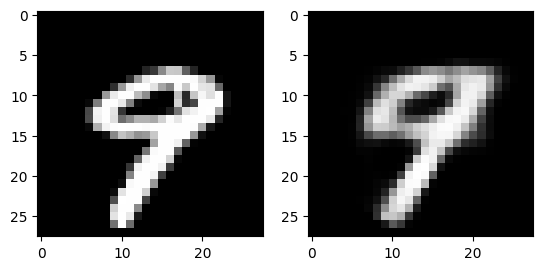

In [ ]:
import matplotlib.pyplot as plt

i = 9

plt.subplot(1, 2, 1)
plt.imshow(X_test[i].reshape(28, 28))
plt.gray()

plt.subplot(1, 2, 2)
plt.imshow(decoded_imgs[i].reshape(28, 28))
plt.gray()